# GRU RNN

In [31]:
from HelperClass import *
from keras.layers import Dense, SimpleRNN, GRU, LSTM

In [32]:
def generateModel(step, epochs, noOfNeurons, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    model = Sequential()
    model.add(GRU(units=32, input_shape=(1, step), activation="softmax"))
    model.add(Dense(noOfNeurons, activation="softmax"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['acc'])
    model.summary()


    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    X_test = X_test.to_numpy()
    y_test = y_test.to_numpy()

    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    history = History()


    modelOutput = model.fit(X_train, y_train, epochs=epochs, batch_size=16, verbose=2)
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)
    predicted = np.concatenate((trainPredict, testPredict), axis=0)

    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print("Train Score: ", trainScore)
    
    return testPredict, modelOutput, y_test

In [38]:
def outputResult(y_test, testPredict, modelOutput,epochs,noOfNeurons):
    
    # Converting the predicated value to integer and obtaining the number of unqiue labels predicated
    testPredict = np.rint(testPredict)
    uniqueValues = np.unique(testPredict)
    
    print("Predicted Values = " , len(uniqueValues))
    for i in uniqueValues:
        print(i,end=', ')

    print()
    
    confusionMatrix(y_test, testPredict)
    print("Precision Score = " , precision_score(y_test, testPredict,average="weighted"))
    #print("Accuracy:",metrics.accuracy_score(y_test, testPredict))

    #Loss is calculated base on the train set, val_loss is calculated base on the validation set.
    plt.plot(range(epochs), modelOutput.history['loss'],label="loss")
    plt.plot(range(epochs), modelOutput.history['acc'],label="acc")
    plt.title(label="Epochs = " + str(epochs) + ", No of neurons = " + str(noOfNeurons))
    plt.legend()
    plt.show()

In [34]:
step = 108

X,y, le, noOfClasses = returnXYData()
epochs = 1000
noOfNeurons = 10

In [35]:
testPredict, modelOutput,y_test = generateModel(step, epochs, noOfNeurons, X, y)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                13632     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 13,973
Trainable params: 13,973
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
484/484 - 1s - loss: 8.9673 - acc: 0.1535
Epoch 2/1000
484/484 - 1s - loss: 5.6791 - acc: 0.1330
Epoch 3/1000
484/484 - 1s - loss: 4.7758 - acc: 0.1330
Epoch 4/1000
484/484 - 1s - loss: 4.6084 - acc: 0.1330
Epoch 5/1000
484/484 - 1s - loss: 4.2448 - acc: 0.1330
Epoch 6/1000
484/484 - 1s - loss: 3.8624 - acc: 0.1330
Epoch 7/1000
484/484 - 1s - loss: 3.6056 - acc: 0.

Epoch 134/1000
484/484 - 1s - loss: 1.3326 - acc: 0.2250
Epoch 135/1000
484/484 - 1s - loss: 1.3725 - acc: 0.2263
Epoch 136/1000
484/484 - 1s - loss: 1.3432 - acc: 0.2256
Epoch 137/1000
484/484 - 1s - loss: 1.3513 - acc: 0.2254
Epoch 138/1000
484/484 - 1s - loss: 1.3555 - acc: 0.2257
Epoch 139/1000
484/484 - 1s - loss: 1.3426 - acc: 0.2263
Epoch 140/1000
484/484 - 1s - loss: 1.3415 - acc: 0.2291
Epoch 141/1000
484/484 - 1s - loss: 1.3417 - acc: 0.2273
Epoch 142/1000
484/484 - 1s - loss: 1.3191 - acc: 0.2269
Epoch 143/1000
484/484 - 1s - loss: 1.3051 - acc: 0.2288
Epoch 144/1000
484/484 - 1s - loss: 1.3326 - acc: 0.2273
Epoch 145/1000
484/484 - 1s - loss: 1.3078 - acc: 0.2268
Epoch 146/1000
484/484 - 1s - loss: 1.3270 - acc: 0.2269
Epoch 147/1000
484/484 - 1s - loss: 1.3358 - acc: 0.2296
Epoch 148/1000
484/484 - 1s - loss: 1.3415 - acc: 0.2273
Epoch 149/1000
484/484 - 1s - loss: 1.3096 - acc: 0.2259
Epoch 150/1000
484/484 - 1s - loss: 1.2856 - acc: 0.2310
Epoch 151/1000
484/484 - 1s - l

Epoch 278/1000
484/484 - 1s - loss: 1.0771 - acc: 0.2433
Epoch 279/1000
484/484 - 1s - loss: 1.0574 - acc: 0.2415
Epoch 280/1000
484/484 - 1s - loss: 1.0880 - acc: 0.2450
Epoch 281/1000
484/484 - 1s - loss: 1.0508 - acc: 0.2401
Epoch 282/1000
484/484 - 1s - loss: 1.0756 - acc: 0.2424
Epoch 283/1000
484/484 - 1s - loss: 1.0555 - acc: 0.2436
Epoch 284/1000
484/484 - 1s - loss: 1.1025 - acc: 0.2419
Epoch 285/1000
484/484 - 1s - loss: 1.0515 - acc: 0.2425
Epoch 286/1000
484/484 - 1s - loss: 1.0783 - acc: 0.2437
Epoch 287/1000
484/484 - 1s - loss: 1.0775 - acc: 0.2424
Epoch 288/1000
484/484 - 1s - loss: 1.0933 - acc: 0.2429
Epoch 289/1000
484/484 - 1s - loss: 1.0683 - acc: 0.2424
Epoch 290/1000
484/484 - 1s - loss: 1.0525 - acc: 0.2400
Epoch 291/1000
484/484 - 1s - loss: 1.0745 - acc: 0.2402
Epoch 292/1000
484/484 - 1s - loss: 1.0611 - acc: 0.2414
Epoch 293/1000
484/484 - 1s - loss: 1.0556 - acc: 0.2440
Epoch 294/1000
484/484 - 1s - loss: 1.0849 - acc: 0.2436
Epoch 295/1000
484/484 - 1s - l

Epoch 422/1000
484/484 - 1s - loss: 0.9645 - acc: 0.2467
Epoch 423/1000
484/484 - 1s - loss: 0.9616 - acc: 0.2464
Epoch 424/1000
484/484 - 1s - loss: 0.9930 - acc: 0.2471
Epoch 425/1000
484/484 - 1s - loss: 0.9721 - acc: 0.2505
Epoch 426/1000
484/484 - 1s - loss: 0.9775 - acc: 0.2474
Epoch 427/1000
484/484 - 1s - loss: 0.9841 - acc: 0.2462
Epoch 428/1000
484/484 - 1s - loss: 0.9963 - acc: 0.2473
Epoch 429/1000
484/484 - 1s - loss: 0.9520 - acc: 0.2445
Epoch 430/1000
484/484 - 1s - loss: 1.0085 - acc: 0.2484
Epoch 431/1000
484/484 - 1s - loss: 0.9779 - acc: 0.2465
Epoch 432/1000
484/484 - 1s - loss: 0.9858 - acc: 0.2449
Epoch 433/1000
484/484 - 1s - loss: 0.9858 - acc: 0.2456
Epoch 434/1000
484/484 - 1s - loss: 0.9797 - acc: 0.2422
Epoch 435/1000
484/484 - 1s - loss: 0.9860 - acc: 0.2465
Epoch 436/1000
484/484 - 1s - loss: 1.0107 - acc: 0.2440
Epoch 437/1000
484/484 - 1s - loss: 0.9939 - acc: 0.2468
Epoch 438/1000
484/484 - 1s - loss: 0.9798 - acc: 0.2462
Epoch 439/1000
484/484 - 1s - l

Epoch 566/1000
484/484 - 1s - loss: 0.9622 - acc: 0.2474
Epoch 567/1000
484/484 - 1s - loss: 0.9328 - acc: 0.2493
Epoch 568/1000
484/484 - 1s - loss: 0.9444 - acc: 0.2512
Epoch 569/1000
484/484 - 1s - loss: 0.9457 - acc: 0.2451
Epoch 570/1000
484/484 - 1s - loss: 0.9459 - acc: 0.2487
Epoch 571/1000
484/484 - 1s - loss: 0.9524 - acc: 0.2495
Epoch 572/1000
484/484 - 1s - loss: 0.9442 - acc: 0.2503
Epoch 573/1000
484/484 - 1s - loss: 0.9431 - acc: 0.2526
Epoch 574/1000
484/484 - 1s - loss: 0.9455 - acc: 0.2522
Epoch 575/1000
484/484 - 1s - loss: 0.9771 - acc: 0.2486
Epoch 576/1000
484/484 - 1s - loss: 0.9356 - acc: 0.2516
Epoch 577/1000
484/484 - 1s - loss: 0.9455 - acc: 0.2504
Epoch 578/1000
484/484 - 1s - loss: 0.9446 - acc: 0.2500
Epoch 579/1000
484/484 - 1s - loss: 0.9182 - acc: 0.2526
Epoch 580/1000
484/484 - 1s - loss: 0.9510 - acc: 0.2485
Epoch 581/1000
484/484 - 1s - loss: 0.9552 - acc: 0.2516
Epoch 582/1000
484/484 - 1s - loss: 0.9837 - acc: 0.2494
Epoch 583/1000
484/484 - 1s - l

Epoch 710/1000
484/484 - 1s - loss: 0.8941 - acc: 0.2546
Epoch 711/1000
484/484 - 1s - loss: 0.8911 - acc: 0.2537
Epoch 712/1000
484/484 - 1s - loss: 0.8911 - acc: 0.2544
Epoch 713/1000
484/484 - 1s - loss: 0.9284 - acc: 0.2566
Epoch 714/1000
484/484 - 1s - loss: 0.8806 - acc: 0.2555
Epoch 715/1000
484/484 - 1s - loss: 0.9065 - acc: 0.2552
Epoch 716/1000
484/484 - 1s - loss: 0.9072 - acc: 0.2524
Epoch 717/1000
484/484 - 1s - loss: 0.8975 - acc: 0.2533
Epoch 718/1000
484/484 - 1s - loss: 0.9231 - acc: 0.2540
Epoch 719/1000
484/484 - 1s - loss: 0.8925 - acc: 0.2535
Epoch 720/1000
484/484 - 1s - loss: 0.9498 - acc: 0.2533
Epoch 721/1000
484/484 - 1s - loss: 0.9015 - acc: 0.2546
Epoch 722/1000
484/484 - 1s - loss: 0.9040 - acc: 0.2558
Epoch 723/1000
484/484 - 1s - loss: 0.8872 - acc: 0.2549
Epoch 724/1000
484/484 - 1s - loss: 0.9431 - acc: 0.2522
Epoch 725/1000
484/484 - 1s - loss: 0.9463 - acc: 0.2546
Epoch 726/1000
484/484 - 1s - loss: 0.9018 - acc: 0.2555
Epoch 727/1000
484/484 - 1s - l

Epoch 854/1000
484/484 - 1s - loss: 0.8827 - acc: 0.2540
Epoch 855/1000
484/484 - 1s - loss: 0.8843 - acc: 0.2518
Epoch 856/1000
484/484 - 1s - loss: 0.8910 - acc: 0.2547
Epoch 857/1000
484/484 - 1s - loss: 0.9028 - acc: 0.2551
Epoch 858/1000
484/484 - 1s - loss: 0.8936 - acc: 0.2556
Epoch 859/1000
484/484 - 1s - loss: 0.8914 - acc: 0.2542
Epoch 860/1000
484/484 - 1s - loss: 0.8992 - acc: 0.2526
Epoch 861/1000
484/484 - 1s - loss: 0.8836 - acc: 0.2526
Epoch 862/1000
484/484 - 1s - loss: 0.9362 - acc: 0.2546
Epoch 863/1000
484/484 - 1s - loss: 0.8870 - acc: 0.2522
Epoch 864/1000
484/484 - 1s - loss: 0.8845 - acc: 0.2540
Epoch 865/1000
484/484 - 1s - loss: 0.8957 - acc: 0.2547
Epoch 866/1000
484/484 - 1s - loss: 0.9066 - acc: 0.2552
Epoch 867/1000
484/484 - 1s - loss: 0.9148 - acc: 0.2558
Epoch 868/1000
484/484 - 1s - loss: 0.9014 - acc: 0.2547
Epoch 869/1000
484/484 - 1s - loss: 0.9063 - acc: 0.2540
Epoch 870/1000
484/484 - 1s - loss: 0.8695 - acc: 0.2561
Epoch 871/1000
484/484 - 1s - l

Epoch 998/1000
484/484 - 0s - loss: 0.8876 - acc: 0.2566
Epoch 999/1000
484/484 - 0s - loss: 0.9096 - acc: 0.2542
Epoch 1000/1000
484/484 - 0s - loss: 0.8182 - acc: 0.2553
Train Score:  [0.9180590510368347, 0.25235819816589355]


Predicted Values =  7
0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 
Confusion Matrix:  x-axis = Predicated Label, y-axis = True Label
[[401 147  19  24   3  15  42]
 [ 54 298  35  25   2  10  10]
 [ 13 195 233 111   4   8  24]
 [  3   8  20 532   4   8  19]
 [  0  20   5  79   4  12  41]
 [  2   1   1  11   5  16  92]
 [ 10  11   9  18  14  57 643]]
Precision Score =  0.6473285767147015


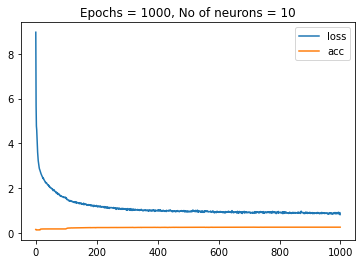

In [39]:
outputResult(y_test, testPredict, modelOutput,epochs,noOfNeurons)